In [ ]:
import numpy as np
from numpy.linalg import norm


In [ ]:
u12 = [5, 4, 2, 1]
u21 = [5, 3, 2, 1]

u13 = [5, 1, 4, 2, 1]
u31 = [1, 4, 2, 5, 4]
cos12 = np.dot(u12, u21)/(norm(u12)*norm(u21))
cos13 = np.dot(u13, u31)/(norm(u13)*norm(u31))

In [ ]:
cos12

0.9916035457647598

In [ ]:
cos13

0.5742710457985438

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

# Sample user-item matrix
R = np.array([[5, 3, 0, 1], [4, 0, 3, 1], [1, 1, 0, 5], [1, 0, 0, 4], [0, 1, 5, 4]], dtype=float)

# Applying SVD
U, sigma, Vt = svds(R, k=2)  # k is the number of latent factors

# Reconstructing the original matrix
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Print the predicted ratings
print(predicted_ratings)


[[5.33563371 2.0435826  0.59890614 0.73454399]
 [3.51517466 1.46367965 1.2126636  1.90688502]
 [1.03998884 0.69673312 2.1971771  3.76179275]
 [0.74857775 0.52257305 1.72840065 2.96320181]
 [0.24504777 0.51932216 2.99375423 5.19308393]]


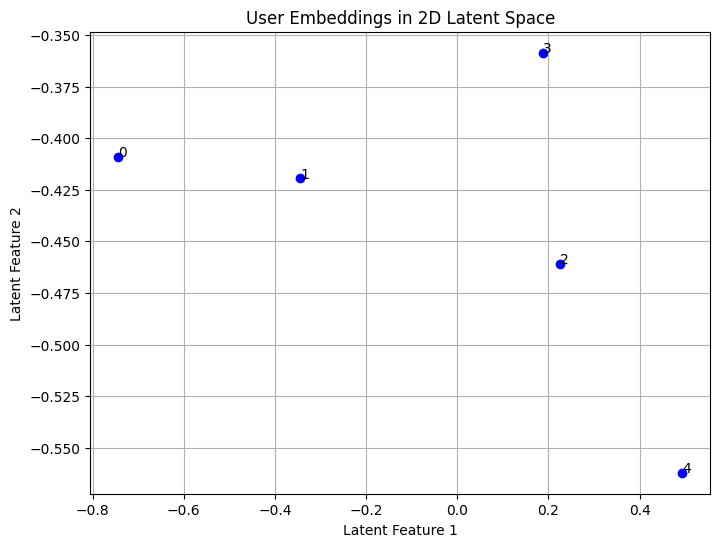

In [ ]:
# Plotting the user embeddings in the 2D latent space
plt.figure(figsize=(8, 6))
plt.scatter(U[:, 0], U[:, 1], c='blue')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.title('User Embeddings in 2D Latent Space')
for i, txt in enumerate(range(U.shape[0])):
    plt.annotate(txt, (U[i, 0], U[i, 1]))
plt.grid()
plt.show()b

In [ ]:
# Expanded dataset
data = {'Movie': ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6', 'Movie7', 'Movie8', 'Movie9', 'Movie10'],
        'Genres': ['Action Adventure', 'Action Sci-Fi', 'Romance Drama', 'Comedy', 'Horror Thriller',
                   'Documentary', 'Animation', 'Action Comedy', 'Sci-Fi Thriller', 'Romance Comedy']}
df = pd.DataFrame(data)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Genres'])

# Calculating Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df.index[df['Movie'] == title].tolist()[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['Movie'].iloc[movie_indices]

# Example: Get recommendations for a user who watched 'Movie2'
recommended_movies = get_recommendations('Movie2')
print("Recommended movies for a user who watched 'Movie2':")
print(recommended_movies)


Recommended movies for a user who watched 'Movie2':
8     Movie9
7     Movie8
0     Movie1
2     Movie3
3     Movie4
4     Movie5
5     Movie6
6     Movie7
9    Movie10
Name: Movie, dtype: object
